## ICP6 - Question 2
Apply K means clustering in the data set :https://umkc.box.com/s/a9lzu9qoqfkbhjwk5nz9m6dyybhl1wqy
a.Remove any null values by the mean.
b.Use the elbow method to find a good number of clusters with the KMeans algorithm
c.Calculate the silhouette score for the above clustering
### 1.Try feature scaling
### 2.Then apply KMeans on the scaled features. Did that improve the Silhouette score? If Yes, can you justify why

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
Following is the Data Dictionary for Credit Card dataset :
1. CUST_ID: Identification of Credit Card holder (Categorical) 
2. BALANCE: Balance amount left in their account to make purchases 
3. BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
4. PURCHASES: Amount of purchases made from account 
5. ONEOFF_PURCHASES: Maximum purchase amount done in one-go 
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment 
7. CASH_ADVANCE: Cash in advance given by the user 
8. PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 
9. ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
10. PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY: How frequently thecash in advance being paid 
12. CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" 
13. PURCHASES_TRX: Numbe of purchase transactions made
14. CREDIT_LIMIT: Limit of Credit Card for user
15. PAYMENTS: Amount of Payment done by user
16. MINIMUM_PAYMENTS: Minimum amount of payments made by user 
17. PRCFULLPAYMENT: Percent of full payment paid by user 
18. Tenure of credit card service for user

In [1]:
#Importing libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
Credit_Card_Data = pd.read_csv('CC.csv')
Credit_Card_Data.head() #printing first five rows

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Finding Null values and replacing with mean

In [3]:
#Finding any null values in data
Credit_Card_Data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### From above we could see null values in CREDIT_LIMIT and MINIMUM_PAYMENTS features

In [4]:
# get mean of values in column MINIMUM PAYMENTS
mean_value=Credit_Card_Data['MINIMUM_PAYMENTS'].mean()
print('Mean value or column MINIMUM_PAYMENTS is :', mean_value)

Mean value or column MINIMUM_PAYMENTS is : 864.2065423050814


In [5]:
# Replace Null in column MINIMUM_PAYMENTS with the mean of values in the same column
Credit_Card_Data['MINIMUM_PAYMENTS'].fillna(value=Credit_Card_Data['MINIMUM_PAYMENTS'].mean(), inplace=True)
Credit_Card_Data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
# get mean of values in column CREDIT_LIMIT
mean_value_CREDIT_LIMIT=Credit_Card_Data['CREDIT_LIMIT'].mean()
print('Mean value or column CREDIT_LIMIT is :', mean_value_CREDIT_LIMIT)

Mean value or column CREDIT_LIMIT is : 4494.449450364621


In [7]:
# Replace Null in column CREDIT_LIMIT with the mean of values in the same column
Credit_Card_Data['CREDIT_LIMIT'].fillna(value=Credit_Card_Data['CREDIT_LIMIT'].mean(), inplace=True)
Credit_Card_Data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Now we could see there was no null values in data

In [8]:
#Splitting data into x, y
x = Credit_Card_Data.iloc[:,1:]
print('shape of x is : ' ,x.shape)
y = Credit_Card_Data.iloc[:,-1]
print('shape of y is : ' ,y.shape)

shape of x is :  (8950, 17)
shape of y is :  (8950,)


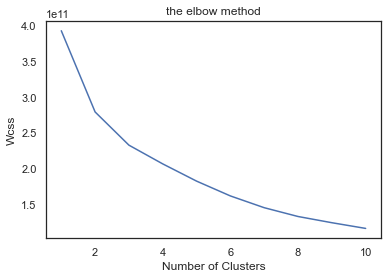

In [9]:
#elbow method to know the number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

#### From graph, when k = 3 data is changing slowly .

In [10]:
#Silhouette score

nclusters = 3 # this is the k in kmeans , from above graph
km = KMeans(n_clusters=nclusters)
km.fit(x)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
score = metrics.silhouette_score(x, y_cluster_kmeans)
print()
print('Silhouette score when k = 3 is :',score)


Silhouette score when k = 3 is : 0.4654251280958053


#### Silhouette score for 3 clusters is 0.46

## 1.Feature Scaling

In [11]:
# Feauture Scaling 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)

### Applying elbow method for scaled features.

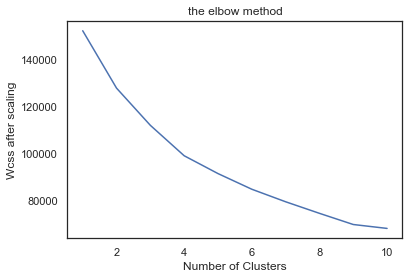

In [12]:
#elbow method to know the number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss after scaling')
plt.show()

#### From graph, when k = 4 data is changing slowly .

## 2.Applying KMeans for scaled features

In [13]:
# Appling Kmeans over scaled features
nclusters = 4 # this is the k in kmeans from above graph
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

KMeans(n_clusters=4)

### Finding Silhouette score after scaling

In [14]:
#Silhouette score
y_cluster_kmeans = km.predict(X_scaled)
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print()
print('Silhouette score after scaling when k = 4 is :',score)


Silhouette score after scaling when k = 4 is : 0.1976074492720698


## Conclusion:
### Apply Feauture Scaling and kMeans algorithm, silhouette score was not improved and it was decreased from 0.46 to 0.19